<a href="https://colab.research.google.com/github/joshimohitm9/Machine-Learning/blob/main/Naive_Bayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd

link="https://raw.githubusercontent.com/codebasics/py/master/ML/14_naive_bayes/titanic.csv"

import warnings
warnings.filterwarnings("ignore")

In [34]:
df=pd.read_csv(link)

In [35]:
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [36]:
df=df[["Pclass","Sex","Age","Fare","Survived"]]
df

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [37]:
x=df.iloc[:,:4]
y=df["Survived"]

In [38]:
x

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [39]:
sex=pd.get_dummies(x.Sex)
sex.drop(["female"],axis=1,inplace=True)
sex

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [40]:
x=pd.concat([x,sex],axis='columns')
x.drop(["Sex"],axis=1,inplace=True)
x

,Pclass,Age,Fare,male
0,3,22.0,7.2500,True
1,1,38.0,71.2833,False
2,3,26.0,7.9250,False
3,1,35.0,53.1000,False
4,3,35.0,8.0500,True
...,...,...,...,...
886,2,27.0,13.0000,True
887,1,19.0,30.0000,False
888,3,NaN,23.4500,False
889,1,26.0,30.0000,True


In [41]:
x.Age.isnull().sum()

177

In [42]:
x["Age"]=x["Age"].fillna(x["Age"].median())
x.isnull().sum()
x

,Pclass,Age,Fare,male
0,3,22.0,7.2500,True
1,1,38.0,71.2833,False
2,3,26.0,7.9250,False
3,1,35.0,53.1000,False
4,3,35.0,8.0500,True
...,...,...,...,...
886,2,27.0,13.0000,True
887,1,19.0,30.0000,False
888,3,28.0,23.4500,False
889,1,26.0,30.0000,True


In [43]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [44]:
len(x_train)

712

In [45]:
len(x_test)

179

In [46]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7374301675977654

In [47]:
y_pred=model.predict(x_test)

In [48]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1])

<Axes: >

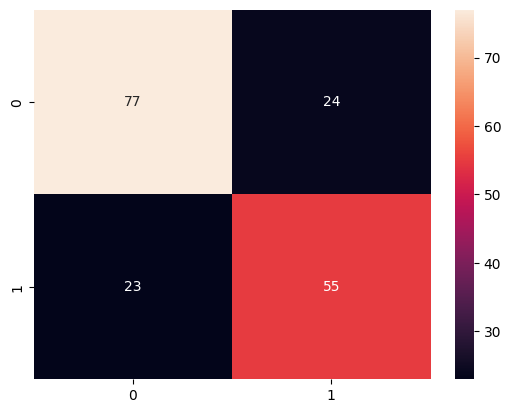

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
import seaborn as sns
sns.heatmap(cm,annot =True)

In [50]:
spam="https://raw.githubusercontent.com/codebasics/py/master/ML/14_naive_bayes/spam.csv"
df=pd.read_csv(spam)
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [51]:
df["spam"]=df["Category"].apply(lambda x: 1 if x=="spam" else 0)

In [52]:
df

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [53]:
df.drop(["Category"],axis=1,inplace=True)
df

,Message,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will ü b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.Message,df.spam,test_size=0.25,random_state=23)

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()
x_train_count=cv.fit_transform(x_train.values)
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [56]:
from sklearn.naive_bayes import MultinomialNB
mn=MultinomialNB()
mn.fit(x_train_count,y_train)

MultinomialNB()

In [57]:
x_test_count=cv.transform(x_test)
mn.score(x_test_count, y_test)

0.9877961234745154

In [58]:
email=[
    "SPECIAL free Hey you! I just started taking birth control...You don't have to pull out. Come say hi?",
    "business analyst”: Top Talent Hunt Senior Business Analyst"]

In [59]:
email_valid=cv.transform(email)
mn.predict(email_valid)

array([0, 0])

In [60]:
mn.predict(x_test_count)[75:]

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
y_test[75:]

4781    0
4980    0
3575    0
1111    0
63      0
       ..
2613    0
3401    1
3356    0
1729    0
543     0
Name: spam, Length: 1318, dtype: int64

In [62]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ("v",CountVectorizer()),
    ("mn",MultinomialNB())
])

In [63]:
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.9877961234745154